# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# Pandas for data handling
import pandas as pd

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns

---
## A. Project Description


In [4]:
student_name = "Shashikanth Senthil Kumar"
student_id = "25218722"
group_id = "9"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
business_use_case_description = """
Enable NBA teams and analysts to make data-driven decisions on draft prospects using interpretable models. 
Logistic regression provides insights into which features (like points, rebounds, usage rate) most influence draft likelihood.

Hypothesis:
A logistic regression model can accurately predict draft outcomes based on player statistics, outperforming a random baseline, and reveal significant predictors of draft selection.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
business_objectives = """
Accurate results will allow teams to prioritize scouting resources toward players with a higher probability of being drafted, improving the quality of draft selections and reducing wasted time and investment. 
Incorrect results, however, may cause teams to overlook valuable players or over-invest in players with a low chance of success, leading to financial loss, missed opportunities, and reduced team performance.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
stakeholders_expectations_explanations = """
The results will be used to guide scouting and recruitment strategies.
The primary users of the predictions will be NBA teams, talent scouts, sports analysts, and team management. 
Indirectly, players themselves and their agents may also be impacted, as draft predictions can influence career opportunities, negotiations, and visibility in the draft process.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# Load the datasets
X_train = pd.read_csv('../data_shash/X_train.csv')
y_train = pd.read_csv('../data_shash/y_train.csv')
X_val = pd.read_csv('../data_shash/X_val.csv')
y_val = pd.read_csv('../data_shash/y_val.csv')
X_test = pd.read_csv('../data_shash/X_test.csv')
y_test = pd.read_csv('../data_shash/y_test.csv')

---
## D. Feature Selection


### D.1 Final Selection of Features

In [15]:
# The final selected features are
features_list = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'ht', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'player_id', 'drafted'] 

### D.2 Final Selection of Features after feature engineering

In [16]:
# The final features after feature engineering
final_features = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'height_cm','Height_Impact', 'REB_per', 
       'FT_efficiency', 'player_id', 'drafted']

In [17]:
feature_selection_explanations = """
We are using the same set of features as in Experiment 0 to maintain consistency and to ensure that model performance variations are due to the logistic regression model and not from feature changes.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Use Datacheck to Ensure there is no Null values in the Datasets

In [19]:
# Import custom data checking function
from shash import datacheck

In [20]:
datacheck(X_train)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,41
Ortg,float64,0,0.0,1236
REB_per,float64,0,0.0,684
Height_Impact,float64,0,0.0,9781
height_cm,float64,0,0.0,30
pts,float64,0,0.0,3121
blk,float64,0,0.0,646
gbpm,float64,0,0.0,9752
bpm,float64,0,0.0,9747
porpag,float64,0,0.0,9751


In [21]:
datacheck(y_train)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,9780


In [22]:
datacheck(X_val)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,40
Ortg,float64,0,0.0,806
REB_per,float64,0,0.0,473
Height_Impact,float64,0,0.0,2446
height_cm,float64,0,0.0,25
pts,float64,0,0.0,1338
blk,float64,0,0.0,368
gbpm,float64,0,0.0,2445
bpm,float64,0,0.0,2445
porpag,float64,0,0.0,2443


In [23]:
datacheck(y_val)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,2444


In [24]:
datacheck(X_test)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,34
Ortg,float64,0,0.0,615
REB_per,float64,0,0.0,399
Height_Impact,float64,0,0.0,1292
height_cm,float64,0,0.0,22
pts,float64,0,0.0,808
blk,float64,0,0.0,244
gbpm,float64,0,0.0,1297
bpm,float64,0,0.0,1297
porpag,float64,0,0.0,1293


In [25]:
datacheck(y_test)

,dtype,missing_count,missing_percent,unique_values
player_id,object,0,0.0,1297
----------------,----------------,----------------,----------------,----------------
No duplicate,rows,found,in the,dataset


In [26]:
data_cleaning_explanations = """
Missing values can lead to inaccuracies in data analysis and model predictions. 
In this dataset, there were no missing values in any of the training, validation, or test sets ensuring completeness and reliability for further analysis.
Ignore the duplicates on test sets as they are reflecting the drafted player status.
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_explanations)

---
## F. Feature Engineering

In [28]:
feature_engineering_explanations = """
For this experiment (the Logistic Regression model), no feature engineering is performed. 
We are using the same features as the baseline model, and thus, no interaction terms or additional features were created. 
This maintains consistency in feature selection and ensures comparability of results between the models.
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_explanations)

---
## G. Data Preparation for Modeling

### G.1 Data Transformation "Standardization"

In [30]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to the training, validation and test datasets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [31]:
data_transformation_1_explanations = """
The data transformation process involved standardizing the dataset. 
This step was essential for ensuring that all input features were on the same scale, which is crucial for models like Logistic Regression that are sensitive to feature scaling. 
The StandardScaler was used to transform the features, bringing them to a mean of 0 and a standard deviation of 1. 
By applying this transformation to the training, validation, and test datasets, the model can now treat all features equally during training, leading to improved performance and faster convergence.
"""

In [32]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.2 Data Transformation "Flatten Target Variables"

In [33]:
# Check the shape of the y_train
y_train.shape

(9782, 1)

In [34]:
# Convert y dataframes to 1D arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

In [35]:
# Check the shape of the y_train
y_train.shape

(9782,)

In [36]:
data_transformation_2_explanations = """
The target variable 'drafted' was originally in a column vector shape (n_samples, 1), which is not compatible with many scikit-learn models. 
Flattening the target to a 1-dimensional array ensures proper input format for training and evaluation functions. 
This transformation allows models like Logistic Regression to correctly interpret the labels, avoids warnings during fitting, and ensures consistent behavior across cross-validation and predictions.
"""

In [37]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_2_explanations)

---
## H. Save Datasets


The Datasets are already saved

---
## I. Selection of Performance Metrics



In [38]:
# Import the performance metrics from sklearn
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score,  ConfusionMatrixDisplay,
    classification_report
)

In [39]:
performance_metrics_explanations = """
For this NBA draft prediction task, multiple performance metrics are considered to provide a well-rounded evaluation. 
Accuracy alone may not be sufficient, especially if the dataset is imbalanced (i.e., fewer players get drafted compared 
to those who don’t). Therefore, precision, recall, and F1-score are included to better capture the trade-offs between 
false positives and false negatives. 

- Precision: helps us understand how many of the players predicted as drafted are actually drafted, which is important 
  when we want to minimize false positives. 
- Recall tells us how many of the actual drafted players were correctly identified, which is critical if the goal is 
  to avoid missing potential talents. 
- F1-score balances precision and recall, making it a strong overall measure when both false positives and false negatives 
  are costly. 
- ROC-AUC is included to evaluate the model’s ability to discriminate between drafted and not drafted players across 
  different thresholds. 
- Confusion Matrix provides a clear breakdown of true positives, true negatives, false positives, and false negatives 
  for better interpretability. 

Using these combined metrics gives a more complete view of model performance and ensures that the evaluation is not biased 
towards a single aspect of prediction.
"""


In [40]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

---
## J. Train Machine Learning Model

### J.1 Import Algorithm

In [41]:
# Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [42]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=5000, random_state=42)

In [43]:
algorithm_selection_explanations = """
Logistic Regression is a good fit for this problem because it is a linear model suitable for binary classification tasks like predicting whether a player will be drafted or not. 
It allows us to quantify the influence of each player statistic (e.g., points, rebounds, usage rate) on draft likelihood through feature coefficients. 
Additionally, Logistic Regression can handle class imbalance with class weights, making it suitable for datasets where drafted players are a minority.
"""


In [44]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [45]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],   # regularization strength
    'penalty': ['l1', 'l2'],              # type of penalty
    'class_weight': ['balanced']  # fixed class weights
}

In [46]:
hyperparameters_selection_explanations = """
We are tuning the 'C' parameter to control the regularization strength, which helps prevent overfitting by penalizing large coefficients. 
The 'penalty' parameter is tuned to choose between L1 (sparse feature selection) and L2 (ridge) regularization. 
We keep 'class_weight' fixed as 'balanced' to handle the class imbalance in drafted vs. non-drafted players. 
These hyperparameters are critical for optimizing model performance and ensuring generalization.
"""


In [47]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [48]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [49]:
# GridSearchCV with roc_auc as scoring metric
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # 5-fold cross validation
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score (CV):", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best ROC AUC Score (CV): 0.982853047363881


### J.4 Model Technical Performance

In [50]:
# Get predicted labels
y_pred_train = best_model.predict(X_train_scaled)
y_pred_val = best_model.predict(X_val_scaled)

# Get predicted probabilities (only needed for ROC AUC, log loss, etc.)
y_proba_train = best_model.predict_proba(X_train_scaled)[:, 1]  # probability of class 1
y_proba_val = best_model.predict_proba(X_val_scaled)[:, 1]  # probability of class 1

In [51]:
# Import Custom Package for Evaluation
from shash.evaluation import evaluate_model


--- Train Set Evaluation ---
Accuracy : 0.9408
Precision: 0.1181
Recall   : 0.9506
F1 Score : 0.2101
ROC AUC  : 0.9872

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      9701
         1.0       0.12      0.95      0.21        81

    accuracy                           0.94      9782
   macro avg       0.56      0.95      0.59      9782
weighted avg       0.99      0.94      0.96      9782

Confusion Matrix (Raw Counts):
[[9126  575]
 [   4   77]]


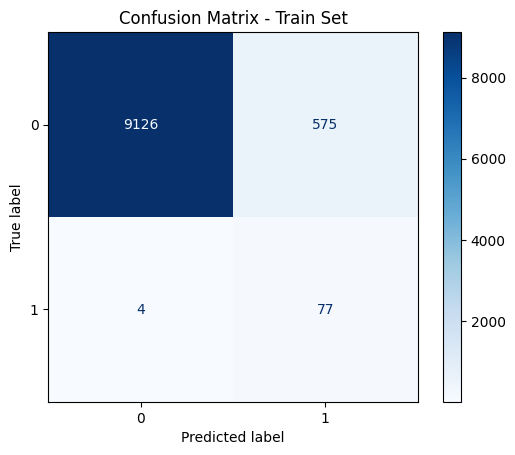

In [52]:
# Train evaluation
evaluate_model(y_train, y_pred_train, y_proba_train, dataset_name="Train Set")


--- Validation Set Evaluation ---
Accuracy : 0.9456
Precision: 0.1074
Recall   : 1.0000
F1 Score : 0.1939
ROC AUC  : 0.9933

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2430
         1.0       0.11      1.00      0.19        16

    accuracy                           0.95      2446
   macro avg       0.55      0.97      0.58      2446
weighted avg       0.99      0.95      0.97      2446

Confusion Matrix (Raw Counts):
[[2297  133]
 [   0   16]]


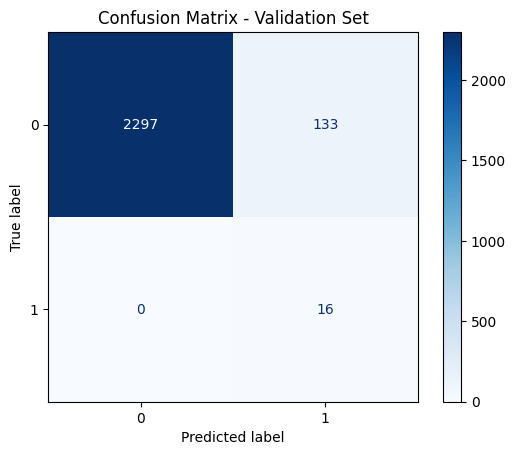

In [53]:
# Validation evaluation
evaluate_model(y_val, y_pred_val, y_proba_val, dataset_name="Validation Set")

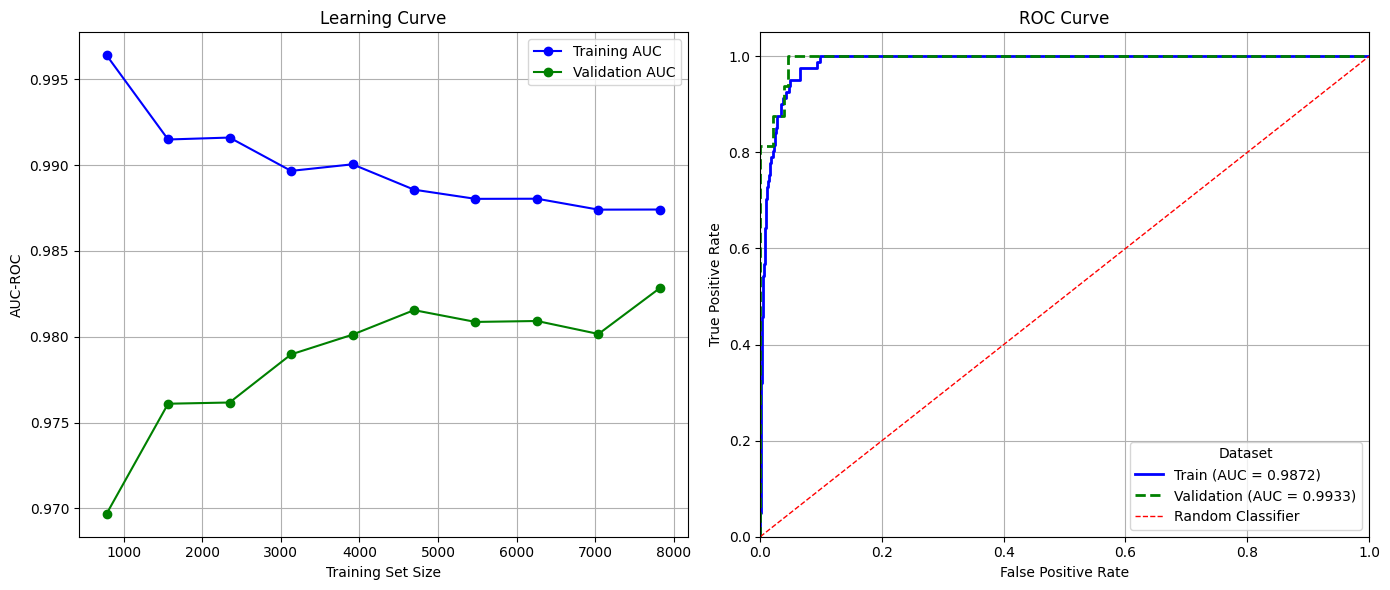

In [54]:
# Import roc_curve and learning_curve from sklearn
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_proba_val)
roc_auc_val = roc_auc_score(y_val, y_proba_val)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Learning Curve
ax[0].plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training AUC')
ax[0].plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation AUC')
ax[0].set_xlabel('Training Set Size')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_title('Learning Curve')
ax[0].legend()
ax[0].grid(True)

# ROC Curve
ax[1].plot(fpr_train, tpr_train, color='blue', lw=2, linestyle='-', label=f'Train (AUC = {roc_auc_train:.4f})')
ax[1].plot(fpr_val, tpr_val, color='green', lw=2, linestyle='--', label=f'Validation (AUC = {roc_auc_val:.4f})')
ax[1].plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend(title='Dataset', loc='lower right')
ax[1].grid(True)

plt.tight_layout()

In [55]:
# Get probabilities for the positive class from best model for the test dataset(X_test)
logistic_test_probs = best_model.predict_proba(X_test_scaled)[:, 1]

In [56]:
# Create output DataFrame with player_id and baseline probabilities
logistic_output_df = pd.DataFrame({
    'player_id': y_test['player_id'],
    'drafted': logistic_test_probs
})

In [57]:
# Save to CSV
logistic_output_df.to_csv("../predictions_shash/test_predictions_logistic.csv", index=False)

In [58]:
model_performance_explanations = """
The Logistic Regression model shows strong performance in identifying drafted players, as indicated by the high recall (0.95 on training and 1.00 on validation) and ROC AUC scores (0.9872 train, 0.9933 validation). 
Precision is low due to the class imbalance, meaning that many non-drafted players are being misclassified as drafted. 
Overall accuracy remains high (~94-95%) because the majority class dominates. 
The model successfully outperforms the baseline dummy classifier, confirming that historical player statistics provide useful predictive signals for draft selection.
"""


In [59]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

In [60]:
# Feature importance analysis
features = X_train.columns
coefficients = best_model.coef_[0]
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

In [61]:
print("Feature Importances:")
print(coef_df)

Feature Importances:
          Feature  Coefficient
13         porpag     1.694121
2             usg     1.615999
14            bpm     1.030422
19  Height_Impact     0.896104
15           gbpm     0.772981
0              GP     0.684972
18      height_cm     0.682721
6          TO_per     0.577682
4         DRB_per     0.466823
12            ftr     0.431516
16            blk     0.391657
7          FT_per     0.051408
9             TPM     0.043794
10         TP_per     0.019098
8        twoP_per    -0.144321
20        REB_per    -0.398562
17            pts    -0.431630
11        stl_per    -0.502630
5         AST_per    -0.518713
3         ORB_per    -1.205826
21  FT_efficiency    -1.224891
1            Ortg    -1.334729


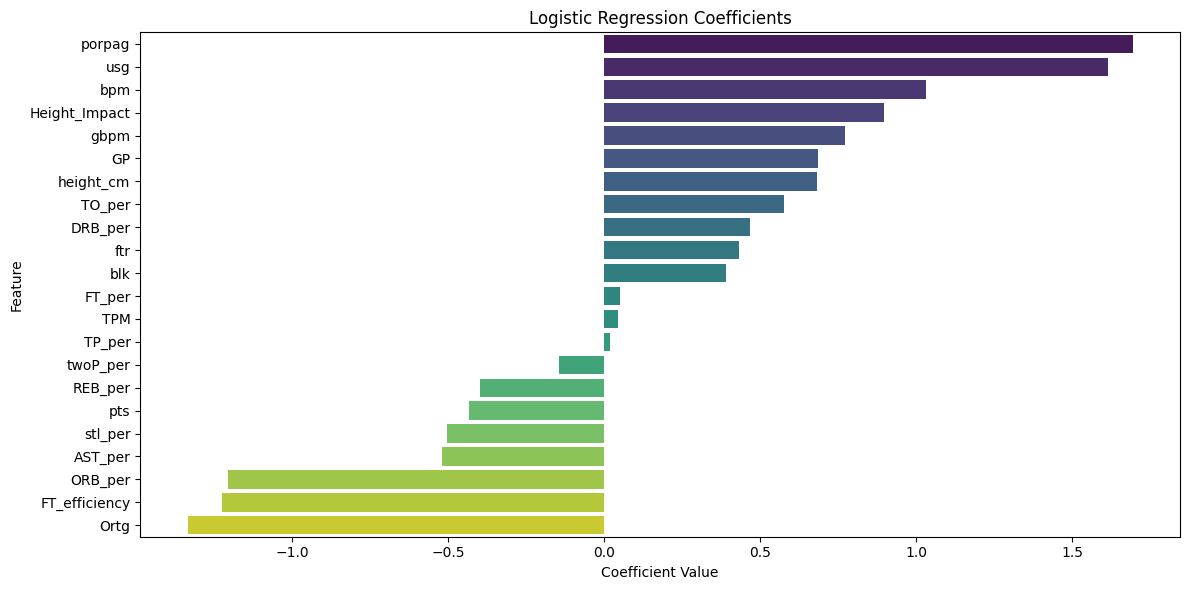

In [62]:
# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()

In [63]:
business_impacts_explanations = """
The logistic regression coefficients indicate which player statistics most influence the likelihood of being drafted. 
Positive coefficients (e.g., porpag, usg, bpm, Height_Impact) show that higher values in these metrics increase draft probability, while negative coefficients (e.g., Ortg, FT_efficiency, ORB_per) decrease it.
From a business perspective, accurate predictions allow scouts and teams to focus on high-potential players, improving recruitment efficiency and reducing missed opportunities. 
Misclassifying drafted players (false negatives) could lead to overlooking talent, while false positives could waste resources pursuing unlikely draftees. Features with higher coefficients (porpag, usg, bpm) have more impact on decision-making, so errors in these predictions carry greater business risk. 
Overall, the model provides actionable insights, but careful interpretation and validation are necessary to mitigate the impact of incorrect predictions on scouting strategies.
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [65]:
experiment_outcome = "Hypothesis Confirmed" # Logistic regression performed well, outperforming the baseline

In [66]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [67]:
# <Student to fill this section>
experiment_results_explanations = """
The logistic regression model successfully distinguished drafted vs. non-drafted players, achieving high recall for the minority class and a strong ROC AUC score, which confirms that it outperforms the  baseline. 
Key predictors such as porpag, usg, and bpm were identified, providing actionable insights for scouts and analysts. 

New insights include understanding which player statistics most influence draft likelihood and confirming that class weighting effectively mitigates imbalance. 
This validates the approach and supports the hypothesis. 

Next steps:
1. Further optimize the Decision Tree model by tuning hyperparameters (max_depth, min_samples_split, min_samples_leaf) and exploring feature selection or engineered features (expected uplift: medium-high). 
2. Experiment with ensemble methods like Random Forest and XGBoost to leverage multiple trees for potentially higher accuracy and robustness (expected uplift: high). 
3. Use the Decision Tree model to generate interpretable decision rules, helping scouts understand which player attributes drive draft likelihood and supporting transparent, data-driven discussions. 

"""

In [68]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)